# Chapter 10 - Simple Linear Regression

## By Angelica Yracheta

## What does a Simple Linear Regression model do?
#### It is a linear regression model that uses only one independent variable to predict the value of a dependent variable. 

In [1]:
# Problem 4:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Problem 5:
data = sns.load_dataset('diamonds') 

In [3]:
# Problem 6:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
- The r-value measures the type and strength of the linear correlation between two variables.
- The possible range of values for the r-value is between 1.0 and -1.0
- A strong positive correlation would be an r-value this is close to 1.0
- A strong negative correlation would be an r-value this is close to -1.0
- No correlation would be an r-value of 0

In [6]:
# Problem 8:
data.corr(numeric_only=True).head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

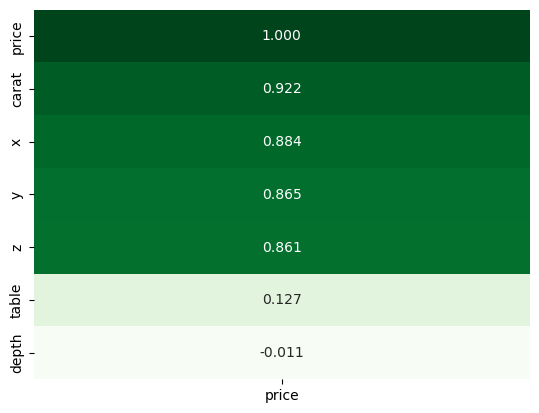

In [8]:
# Problem 9:
sns.heatmap(data=data.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False),
            annot=True, cmap='Greens', cbar=False, fmt=f'.3f') 

## Procedure for Creating and Using a Regression Model
1. Split dataset.
2. Create model from training dataset.
3. Validate model with test dataset.
4. If model is valid, predict data with it.

In [10]:
# Problem 11:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [12]:
# Problem 12:
x_train, x_test, y_train, y_test=train_test_split(
    data[['carat']], data[['price']], test_size=0.30, random_state=20)  

In [14]:
# Problem 13 and 14:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
# Problem 15:
model.score(x_test, y_test)

0.8504107786474794

In [16]:
# Problem 16:
y_predicted = model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [20]:
# Problem 17:
predicted = pd.DataFrame(y_predicted, columns=['Predicted_Price'])
predicted.head(3)
                         

,Predicted_Price
0,9540.641914
1,1940.075433
2,3180.984246


In [23]:
# Problem 18:
combined= predicted.join([y_test.reset_index(drop=True),
                          x_test.reset_index(drop=True)])
combined.head()

,Predicted_Price,price,carat
0,9540.641914,8674,1.52
1,1940.075433,1637,0.54
2,3180.984246,2657,0.70
3,2327.859437,1838,0.59
4,4421.893059,2980,0.86


In [27]:
# Problem 19:
melted= pd.melt(combined, id_vars=['carat'], 
                value_vars=['price', 'Predicted_Price'],
                var_name='price_type', value_name='price_value')
melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,Predicted_Price,156.269013
32360,1.01,Predicted_Price,5585.245072
32361,1.53,Predicted_Price,9618.198715
32362,0.23,Predicted_Price,-464.185393


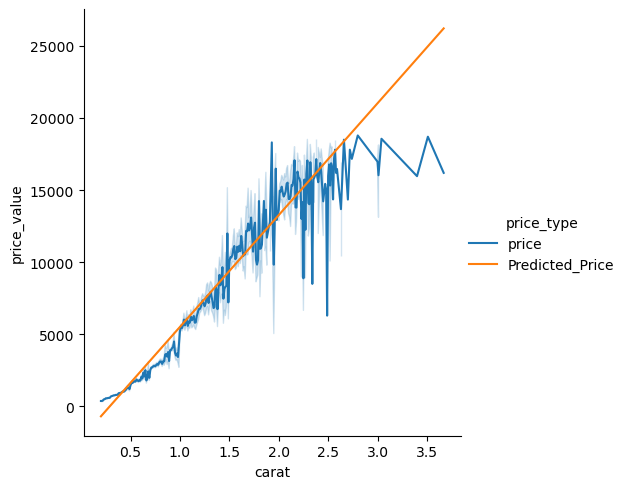

In [33]:
# Problem 20:
sns.relplot(data=melted, kind='line', x='carat', y='price_value', hue='price_type') 

## Regression line equation is **y = mx + b**, where...
- y is the **dependent** variable
- m is the **slope** of the line
- x is the **independent** variable
- b is the **Y-interept** 

In [34]:
# Problem 22:
X = data.carat.values.reshape(-1,1)
y = data.price

In [35]:
# Problem 23:
lr = LinearRegression()
predicted = lr.fit(X,y) 

In [36]:
# Problem 24:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}') 

The slope is [7756.42561797] and the y-intercept is -2256.3605800453947


In [42]:
# Problem 25:
print(f'Regression line equation is y={m}x + {b}') 

Regression line equation is y=[7756.42561797]x + -2256.3605800453947


In [43]:
# Problem 26:
# y= (7756.42561797)(.70) + -2256.3605800453947
print(f'The predicted price for a 0.70 carat diamond is $3,173.14')

The predicted price for a 0.70 carat diamond is $3,173.14


In [44]:
# Problem 27:
# y= (7756.42561797)(.54) + -2256.3605800453947
print(f'The predicted price for a 0.54 carat diamond is $1,932.11') 

The predicted price for a 0.54 carat diamond is $1,932.11


In [45]:
# Problem 28:
# Are the estimates in the previous two cells close to the predicted prices in the results of step 18?
print(f'Yes, the estimates for the last two cells are close to the predicted prices from step 18.') 

Yes, the estimates for the last two cells are close to the predicted prices from step 18.
